- LOG:
- 20220618 Víctor: se tomo el cuaderno de Guillermo a la fecha y se hizo Paso 6 y Paso7.
- 20220620 Ani: pasos 3 y 4 del la notebook que compartó Victor. Para el analisis de nan y ceros yo tomé el dataset original, pero no sé si hay otro dataset con alguna transformación a como lo dejó Guillermo, en todo caso se debería modificar eso.
- 20220622 Unificamos todo falta traducir y acomodar graficos Guille


# EXPLORATORY DATA ANALYSIS


In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Finance related operations
from pandas_datareader import data
from pandas_datareader._utils import RemoteDataError

# Import this to silence a warning when converting data column of a dataframe on the fly
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline

# 1 Carga de dataset
Cargamos el dataset a un `dataframe` de pandas e inmediatamente eliminamos todos las filas `NaN` que pueda llegar a tener


In [21]:
FINANCIAL_DATASET="C:/Users/DTC21/Google Drive/!Repo/DiploDatos/Mentorias/NLP noticia financieras/financial_data.csv"

#FINANCIAL_DATASET = 'financial_data.csv'

# Load data
df = pd.read_csv(FINANCIAL_DATASET)

# Drop rows with no information
df.dropna(how='all', inplace=True)

# STEP 2: Interpretando el dataset

## STEP 2.1: Información general, variables categóricas

Se dara un primer analisis rapido al estado inicial del dataset:

1. Ver cantidades y demensiones
2. Hacer foco en las variables categoriacas si están balanceadas

In [3]:
pd.options.display.max_columns = None # para que no recorte las columnas

print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22077 entries, 0 to 22076
Columns: 231 entries, Unnamed: 0 to AnualPriceVariation
dtypes: float64(227), int64(2), object(2)
memory usage: 39.1+ MB
None


,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Long-term investments,Tax assets,Total non-current assets,Total assets,Payables,Short-term debt,Total current liabilities,Long-term debt,Total debt,Deferred revenue,Tax Liabilities,Deposit Liabilities,Total non-current liabilities,Total liabilities,Other comprehensive income,Retained earnings (deficit),Total shareholders equity,Investments,Net Debt,Other Assets,Other Liabilities,Depreciation & Amortization,Stock-based compensation,Operating Cash Flow,Capital Expenditure,Acquisitions and disposals,Investment purchases and sales,Investing Cash flow,Issuance (repayment) of debt,Issuance (buybacks) of shares,Dividend payments,Financing Cash Flow,Effect of forex changes on cash,Net cash flow / Change in cash,Free Cash Flow,Net Cash/Marketcap,priceBookValueRatio,priceToBookRatio,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceEarningsToGrowthRatio,priceSalesRatio,dividendYield,enterpriseValueMultiple,priceFairValue,ebitperRevenue,ebtperEBIT,niperEBT,grossProfitMargin,operatingProfitMargin,pretaxProfitMargin,netProfitMargin,effectiveTaxRate,returnOnAssets,returnOnEquity,returnOnCapitalEmployed,nIperEBT,eBTperEBIT,eBITperRevenue,payablesTurnover,inventoryTurnover,fixedAssetTurnover,assetTurnover,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,operatingCycle,daysOfPayablesOutstanding,cashConversionCycle,debtRatio,debtEquityRatio,longtermDebtToCapitalization,totalDebtToCapitalization,interestCoverage,cashFlowToDebtRatio,companyEquityMultiplier,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,payoutRatio,operatingCashFlowSalesRatio,freeCashFlowOperatingCashFlowRatio,cashFlowCoverageRatios,shortTermCoverageRatios,capitalExpenditureCoverageRatios,dividendpaidAndCapexCoverageRatios,dividendPayoutRatio,Revenue per Share,Net Income per Share,Operating Cash Flow per Share,Free Cash Flow per Share,Cash per Share,Book Value per Share,Tangible Book Value per Share,Shareholders Equity per Share,Interest Debt per Share,Market Cap,Enterprise Value,PE ratio,Price to Sales Ratio,POCF ratio,PFCF ratio,PB ratio,PTB ratio,EV to Sales,Enterprise Value over EBITDA,EV to Operating cash flow,EV to Free cash flow,Earnings Yield,Free Cash Flow Yield,Debt to Equity,Debt to Assets,Net Debt to EBITDA,Current ratio,Interest Coverage,Income Quality,Dividend Yield,Payout Ratio,SG&A to Revenue,R&D to Revenue,Intangibles to Total Assets,Capex to Operating Cash Flow,Capex to Revenue,Capex to Depreciation,Stock-based compensation to Revenue,Graham Number,ROIC,Return on Tangible Assets,Graham Net-Net,Working Capital,Tangible Asset Value,Net Current Asset Value,Invested Capital,Average Receivables,Average Payables,Average Inventory,Days Sales Outstanding,Days Payables Outstanding,Days of Inventory on Hand,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per Share),5Y Op

Ahora tenemos:
- 22077 muestras
- 5 años (2014 a 2018)
- 230 columnas
 - 228 numeric --> indicadores financieros
 - 1 int       --> columna clase
 - 1 object    --> variable categórica (`Sector`)
A continuación, veremos la distribución de los valores de clase y la distribución de la variable vategórica `Sector`.

In [25]:
df.rename(columns={'Unnamed: 0':'Ticker'}, inplace=True)

In [26]:
df.tail()

,Ticker,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Long-term investments,Tax assets,Total non-current assets,Total assets,Payables,Short-term debt,Total current liabilities,Long-term debt,Total debt,Deferred revenue,Tax Liabilities,Deposit Liabilities,Total non-current liabilities,Total liabilities,Other comprehensive income,Retained earnings (deficit),Total shareholders equity,Investments,Net Debt,Other Assets,Other Liabilities,Depreciation & Amortization,Stock-based compensation,Operating Cash Flow,Capital Expenditure,Acquisitions and disposals,Investment purchases and sales,Investing Cash flow,Issuance (repayment) of debt,Issuance (buybacks) of shares,Dividend payments,Financing Cash Flow,Effect of forex changes on cash,Net cash flow / Change in cash,Free Cash Flow,Net Cash/Marketcap,priceBookValueRatio,priceToBookRatio,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceEarningsToGrowthRatio,priceSalesRatio,dividendYield,enterpriseValueMultiple,priceFairValue,ebitperRevenue,ebtperEBIT,niperEBT,grossProfitMargin,operatingProfitMargin,pretaxProfitMargin,netProfitMargin,effectiveTaxRate,returnOnAssets,returnOnEquity,returnOnCapitalEmployed,nIperEBT,eBTperEBIT,eBITperRevenue,payablesTurnover,inventoryTurnover,fixedAssetTurnover,assetTurnover,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,operatingCycle,daysOfPayablesOutstanding,cashConversionCycle,debtRatio,debtEquityRatio,longtermDebtToCapitalization,totalDebtToCapitalization,interestCoverage,cashFlowToDebtRatio,companyEquityMultiplier,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,payoutRatio,operatingCashFlowSalesRatio,freeCashFlowOperatingCashFlowRatio,cashFlowCoverageRatios,shortTermCoverageRatios,capitalExpenditureCoverageRatios,dividendpaidAndCapexCoverageRatios,dividendPayoutRatio,Revenue per Share,Net Income per Share,Operating Cash Flow per Share,Free Cash Flow per Share,Cash per Share,Book Value per Share,Tangible Book Value per Share,Shareholders Equity per Share,Interest Debt per Share,Market Cap,Enterprise Value,PE ratio,Price to Sales Ratio,POCF ratio,PFCF ratio,PB ratio,PTB ratio,EV to Sales,Enterprise Value over EBITDA,EV to Operating cash flow,EV to Free cash flow,Earnings Yield,Free Cash Flow Yield,Debt to Equity,Debt to Assets,Net Debt to EBITDA,Current ratio,Interest Coverage,Income Quality,Dividend Yield,Payout Ratio,SG&A to Revenue,R&D to Revenue,Intangibles to Total Assets,Capex to Operating Cash Flow,Capex to Revenue,Capex to Depreciation,Stock-based compensation to Revenue,Graham Number,ROIC,Return on Tangible Assets,Graham Net-Net,Working Capital,Tangible Asset Value,Net Current Asset Value,Invested Capital,Average Receivables,Average Payables,Average Inventory,Days Sales Outstanding,Days Payables Outstanding,Days of Inventory on Hand,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per Share

C:\Users\DTC21\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


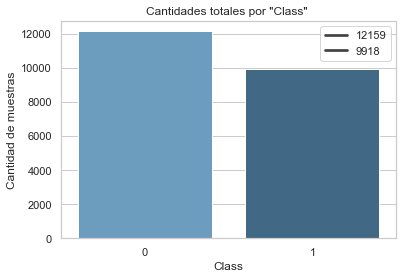

In [6]:
sns.set_theme(style="whitegrid")

df_class = df['Class'].value_counts()
sns.barplot(np.arange(len(df_class)), df_class, palette="Blues_d")
plt.title('Cantidades totales por "Class" ', fontsize=12)
plt.xlabel('Class')
plt.ylabel('Cantidad de muestras')
plt.legend(df_class)

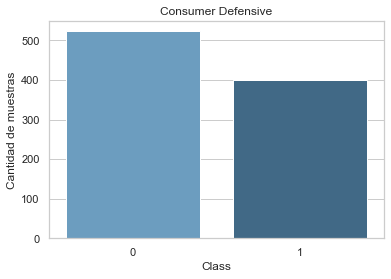

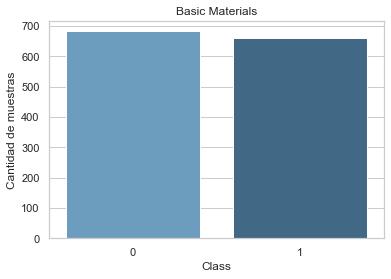

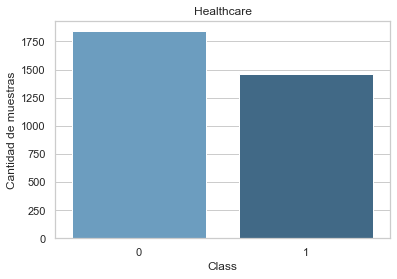

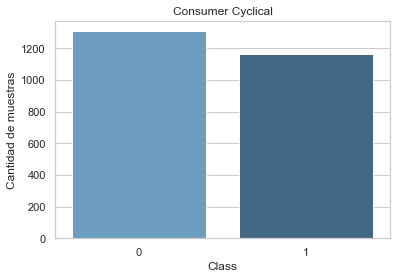

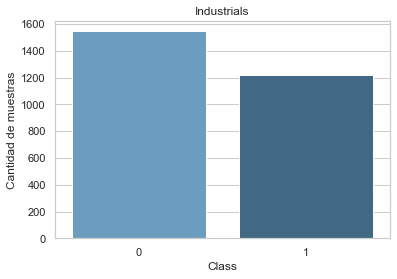

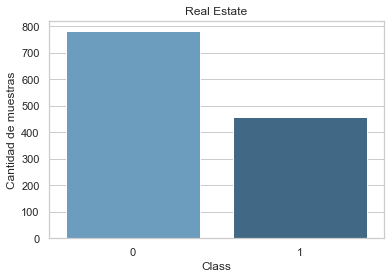

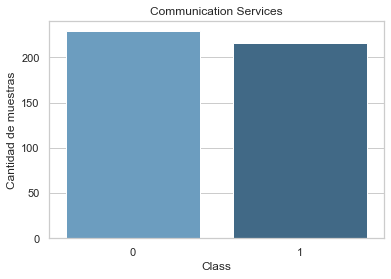

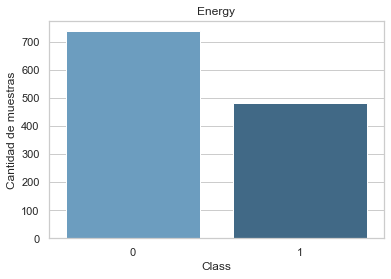

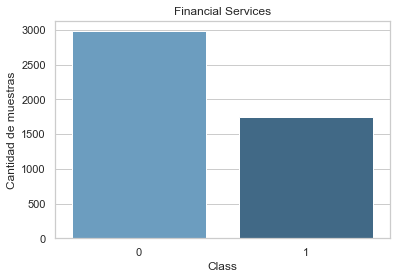

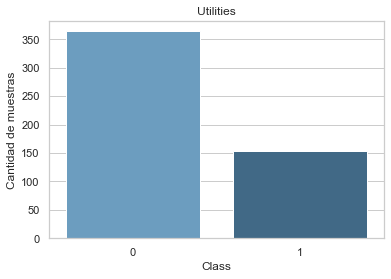

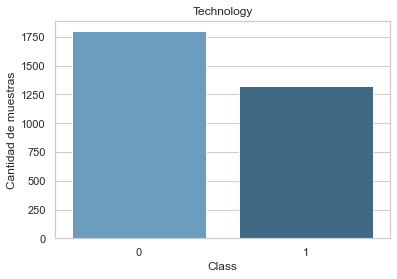

In [7]:
sectors=df['Sector'].unique()
for s in sectors:
    df_class = df[df['Sector']==s]['Class'].value_counts()
    sns.barplot(x=np.arange(len(df_class)), y=df_class, palette="Blues_d")
    plt.title(s, fontsize=12)
    plt.xlabel('Class')
    plt.ylabel('Cantidad de muestras')
    plt.show()

C:\Users\DTC21\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


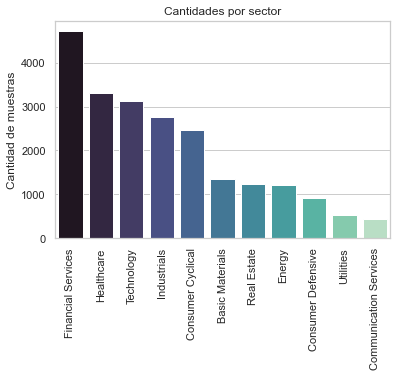

In [8]:
# Plot distribución por sector
df_sector = df['Sector'].value_counts()
sns.barplot(np.arange(len(df_sector)), df_sector, palette="mako")
plt.xticks(np.arange(len(df_sector)), df_sector.index.values.tolist(), rotation=90)
plt.title('Cantidades por sector', fontsize=12)
plt.ylabel('Cantidad de muestras')
plt.show()

Los gráficos muestran que:
1. Las muestras no están balanceadas en términos de `class`.  Hay cerca de 12000 `0` y 10000 `1` 
2. Hay un total de 11 sectores, 5 de ellos con alrededor de 2000+ balances, restan 6 sectores con menos de 1200. En particular, los sectores *Utilities* y  *Communication Services* tienen al rededor de 400 muestras.

## STEP 2.2: Outliers y errores en `AnualPriceVariation`

Se dara una mirada a las variables objetivo para ver que no contengan valores perdidos o irracionales. Para esto nos apoyamos en los valores generales de cada sector como referencia.



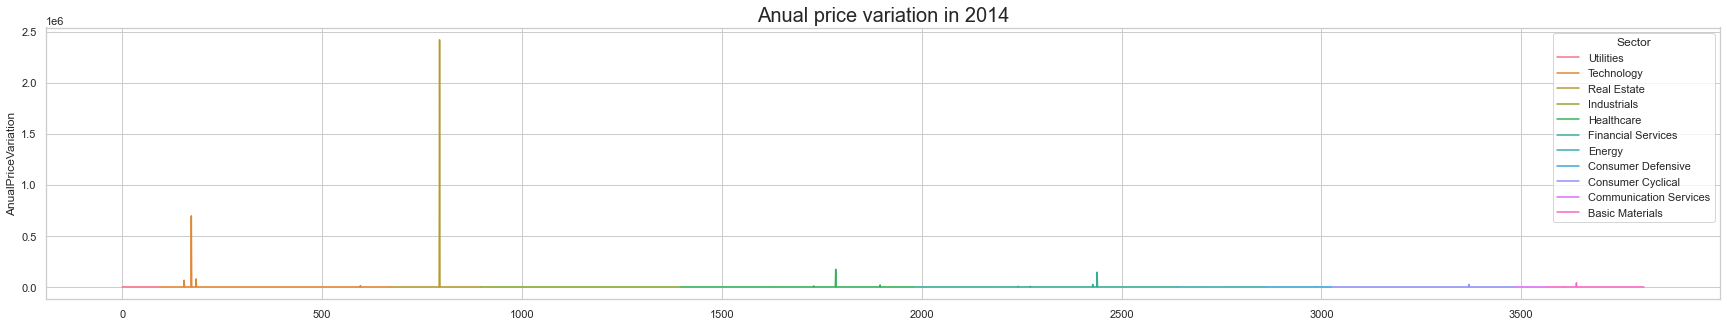

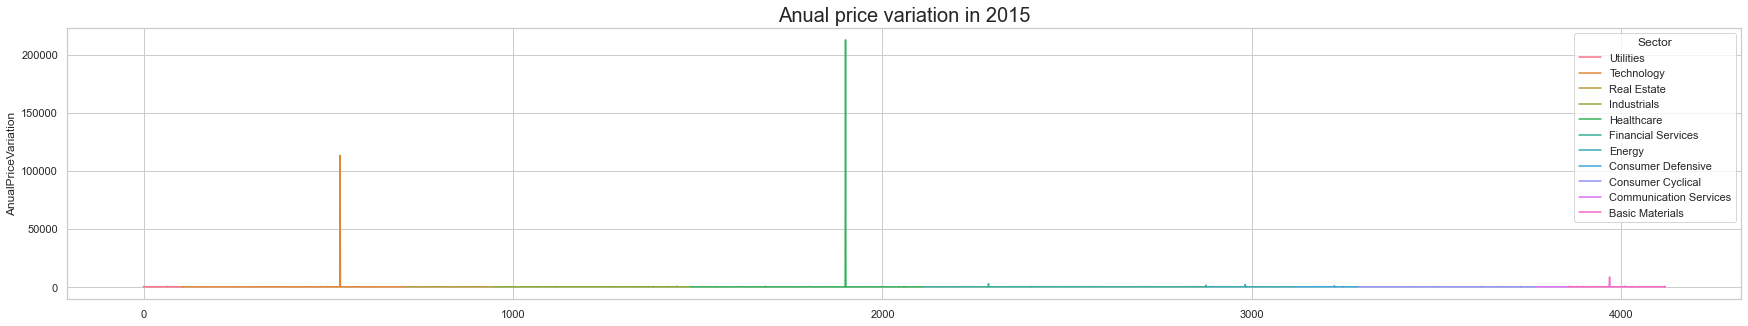

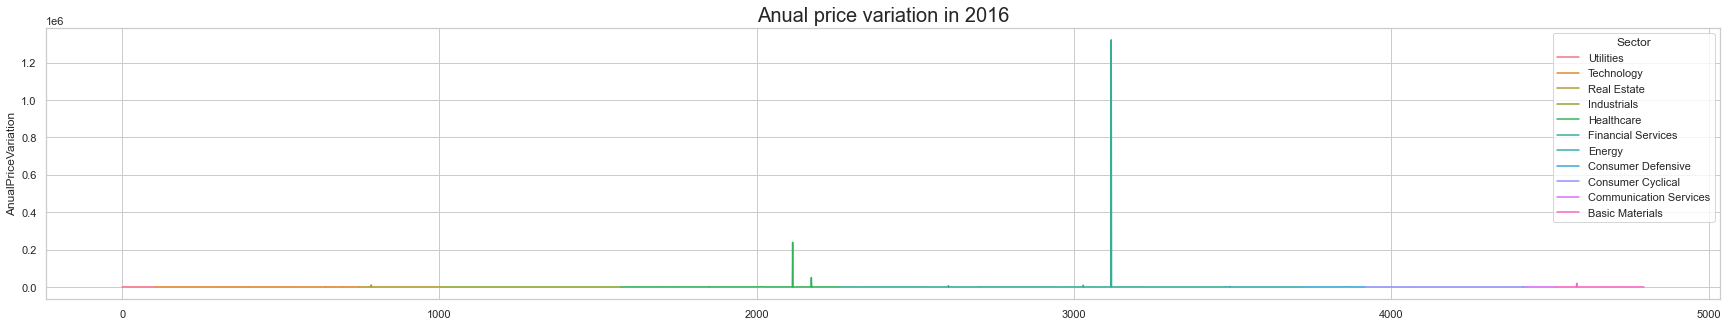

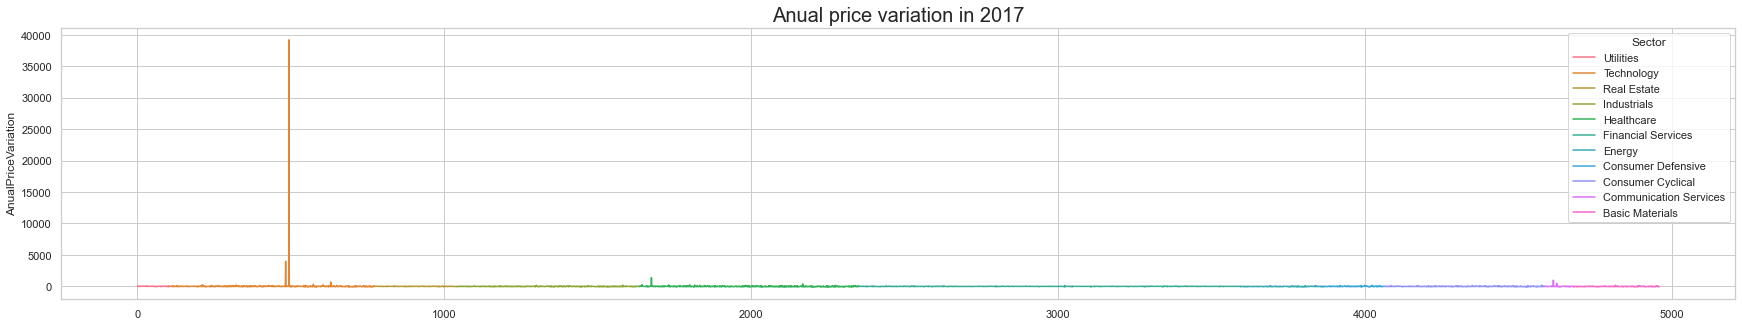

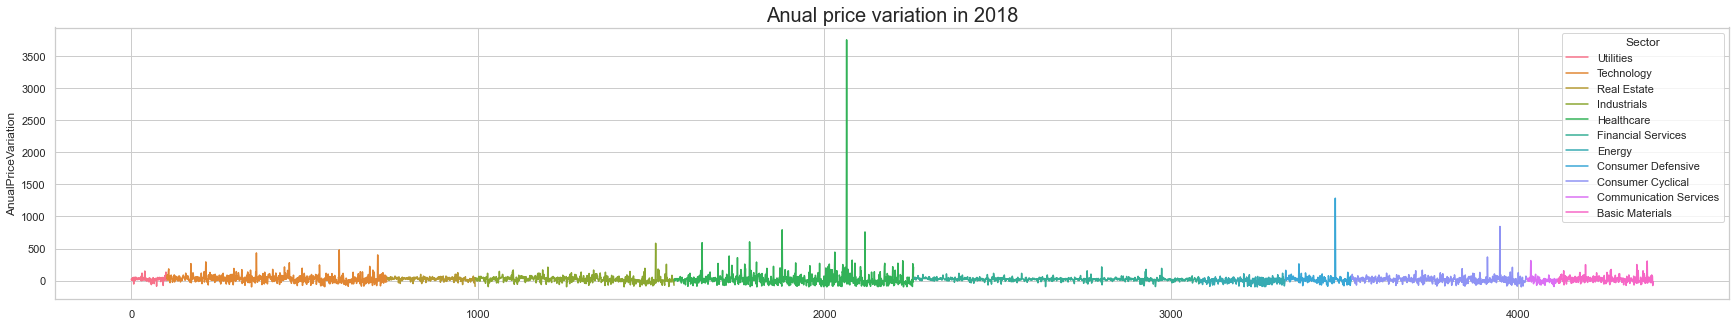

In [61]:
#Prueba gráfico con dfBkp
df_ = df.loc[:, ['year', 'Sector', 'AnualPriceVariation']]
df_.sort_values(['year', 'Sector'], ascending=[True, False], inplace=True)
# Get list of sectors
year_list = df_['year'].unique()

# Plot the percent price variation for each sector
for y in year_list:
    
    temp = df_[df_['year'] == y]
    temp.reset_index(drop=True, inplace=True)
    plt.figure(figsize=(30,5))
    sns.lineplot(x=temp.index, y='AnualPriceVariation', hue='Sector', data=temp)
    plt.title('Anual price variation in ' + str(y), fontsize=20)
    plt.show()

### Tomamos a priori como limite razonable una variacion de precio anual de 500% por encima de este valor lo consideramos erroneo o irracional.
Esto est'a basado en una rapida investigacion de valores frecuentes 

In [10]:
# Obtenemos las muestras mayores al 500%
gain = 500
top_gainers = df_i[df_i['AnualPriceVariation'] >= gain]
top_gainers = top_gainers['AnualPriceVariation'].sort_values(ascending=False)
print(f'{len(top_gainers)} STOCKS con mas de  {gain}% de variacion.')
print()
top_gainers

64 STOCKS con mas de  500% de variacion.



2068     2.418601e+06
11614    1.321281e+06
3308     6.955667e+05
8939     2.387000e+05
4667     2.127000e+05
             ...     
21725    5.823529e+02
5850     5.800000e+02
4137     5.468750e+02
7220     5.233080e+02
8061     5.149660e+02
Name: AnualPriceVariation, Length: 64, dtype: float64

De los gráficos se puede obsearvar que hay valores muy por encima de la media de algunos sectores: 

* Consumer Defensive
* Basic Materials
* Healthcare
* Consumer Cyclical
* Real Estate
* Energy
* Financial Services
* Technology

se hará foco en los casos para ver los posibles motivos de extraordinarios.

Se usará `pandas_datareader` para obtener el precio *Adjusted Close* diario en cada año de los balances con estos valores excesivamente altos de variación anual. De esta forma se podrá analizar si son valores verdaderos.

*Caso de cambio de nombre:*
Uno de los tickers en el top gainer de 2015 cambío su nombre, actualizamos en el dataset. NK --> IBRX
El ticker PUB cambió a ALTA en algun momento pero actualmete tampoco existe con ese nombre. Pero arrancó a mediados de 2015 con lo cual lo excluimos.
https://www.bloomberg.com/quote/NK:US

In [11]:
# Get stocks that increased more than 500%
years=df['year'].unique()
gain = 500
igTick = pd.DataFrame(columns=['Ticker','year'])
for y in years:
    df_=df[df['year']==y]
    yt=str(y+1)
    print(f'Año {yt} tenemos {df_.shape[0]} tickers.')
    top_gainers = df_[df_['AnualPriceVariation'] >= gain]
    top_gainers = top_gainers[['Ticker', 'AnualPriceVariation']].sort_values('AnualPriceVariation')
    print(f'{len(top_gainers)} STOCKS con mas del {gain}% de ganancia anual.')
    xper=np.arange(np.datetime64(yt+'-01-01'), np.datetime64(yt+'-12-31'))
    date_start = '01-01-'+ yt
    date_end = '12-31-'+ yt
    tickers = top_gainers['Ticker'].values
        
    for ticker in tickers:
    
        # Pull daily prices for each ticker from Yahoo Finance
        try:
            daily_price = data.DataReader(ticker, 'yahoo', date_start, date_end)
            
            f = daily_price.index[0].strftime('%m-%d-%Y') # cargo fecha inicial en f
            if (f==date_start):
            # Plot prices with volume
                fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]})
    
                ax0.plot(x=xper, y=daily_price['Adj Close'])
                ax0.set_title(ticker, fontsize=18)
                ax0.set_ylabel('Daily Adj Close $', fontsize=14)
                ax1.plot(daily_price['Volume'])
                ax1.set_ylabel('Volume', fontsize=14)
                ax1.yaxis.set_major_formatter(
                matplotlib.ticker.StrMethodFormatter('{x:.0E}'))

                fig.align_ylabels(ax1)
                fig.tight_layout()
                plt.show()
            else:
                print(f'Para {ticker} no se considera variación anual en {yt} ya que no hay cotización del año completo.')
                igTick.loc[len(igTick)] = [ticker, y]
        except :
            print(f'Except. Hay algun cambio o error en el simbolo {ticker} ')
            igTick.loc[len(igTick)] = [ticker, y]


Año 2015 tenemos 3808 tickers.
22 STOCKS con mas del 500% de ganancia anual.
Para AVXL no se considera variación anual en 2015 ya que no hay cotización del año completo.
Para NYMX no se considera variación anual en 2015 ya que no hay cotización del año completo.
Para BSM no se considera variación anual en 2015 ya que no hay cotización del año completo.
Para SSNT no se considera variación anual en 2015 ya que no hay cotización del año completo.
Para GBT no se considera variación anual en 2015 ya que no hay cotización del año completo.
Para CC no se considera variación anual en 2015 ya que no hay cotización del año completo.
Except. Hay algun cambio o error en el simbolo LBCC 
Para YRIV no se considera variación anual en 2015 ya que no hay cotización del año completo.
Except. Hay algun cambio o error en el simbolo FSB 
Para PJT no se considera variación anual en 2015 ya que no hay cotización del año completo.
Para PEN no se considera variación anual en 2015 ya que no hay cotización del a

En igTick quedan guardados los registros erróneos que se eliminarán del dataframe de trabajo

In [12]:
igTick #tickers a ignorar y su correspondiente año

,Ticker,year
0,AVXL,2014
1,NYMX,2014
2,BSM,2014
3,SSNT,2014
4,GBT,2014
...,...,...
59,DRIO,2018
60,ALIM,2018
61,SSI,2018
62,ANFI,2018


In [ ]:
# Se guarda la lista a eliminar
#igTick.to_csv('C:/Users/DTC21/Google Drive/!Repo/DiploDatos/Mentorias/NLP noticia financieras/igTick.csv')
igTick=pd.read_csv('C:/Users/DTC21/Google Drive/!Repo/DiploDatos/Mentorias/NLP noticia financieras/igTick.csv', index_col=0)

## Conclusión de variaciones grandes
Utilizamos una consulta automatizada a los valores de la web 'yahoo finance' para identificar los problemas de períodos y cambios de nombre y armamos una tabla `igTick` con los símbolos y año erroneos para limpiar el set de datos y que no generen distorsión.

Como pudimos observar en general los simbolos que tienen variación de precio anual mayor a 500 son errores.

Esto es principalmente por haber entrado en ese mismo período a cotizar en la bolsa. Lo cual distorsiona los valores ya que no se cuenta con valor de cotización al inicio del año del balance.


En estos casos eliminamos la muestra solamente para ese año, manteniendo los siguientes si corresponde.
Otra causa que se encontró fue el cambio de símbolo o la desaparición durante el período. En estos casos también se eliminó la muestra.

In [23]:
# Mantenemos el df original en dfbkp
dfbkp=df.copy()
dfbkp.shape

(22077, 231)

In [27]:
#eliminamos las filas erroneas desde igTick
for i,index in igTick.iterrows():
    df.drop(df[(df['year']==igTick.year[i]) & (df.Ticker==igTick.Ticker[i])].index, inplace=True)
print('simbolos eliminados')
print (df.shape)

simbolos eliminados
(22013, 231)


Se eliminaron los errores

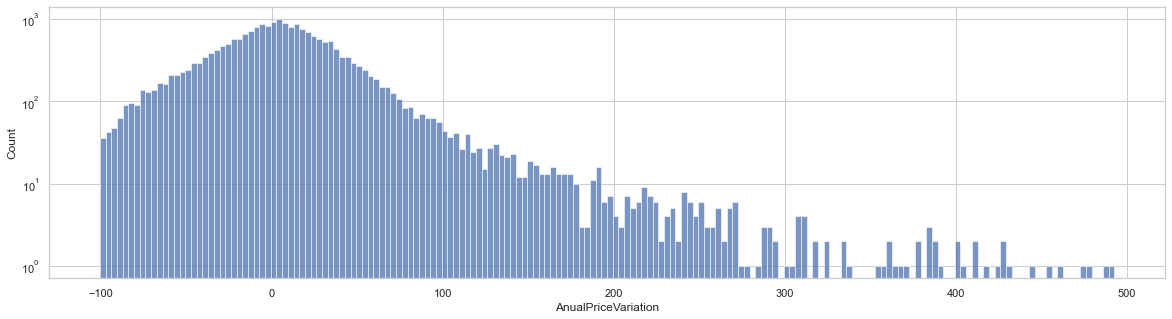

In [15]:
df_ = df.loc[:, ['Sector','Class', 'year', 'AnualPriceVariation']]
plt.figure(figsize=(20, 5))
#ax.set(yscale="log")
plt.yscale('log')
ax = sns.histplot(data=df_, x="AnualPriceVariation")
#ax = sns.plot(x="year", y="AnualPriceVariation", data=df_)

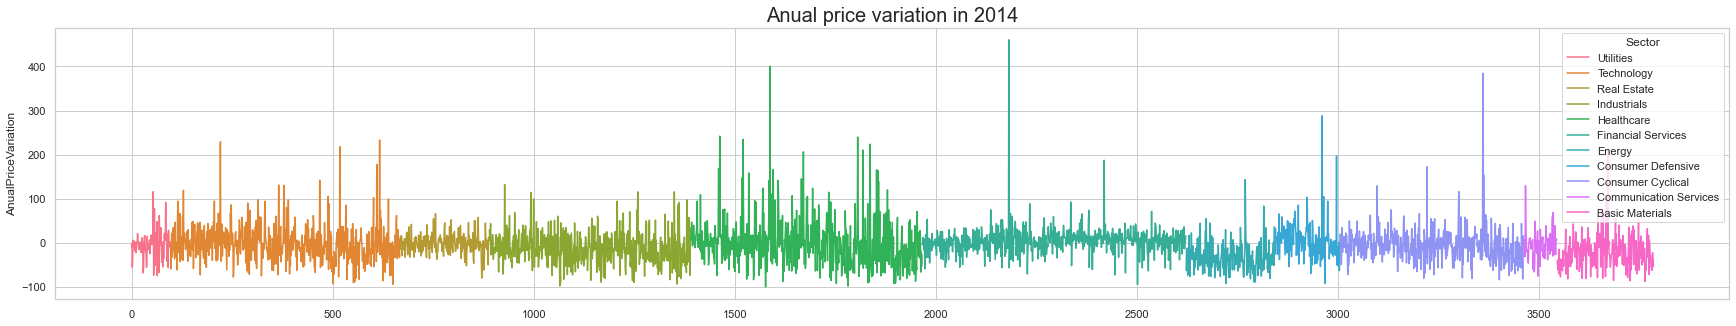

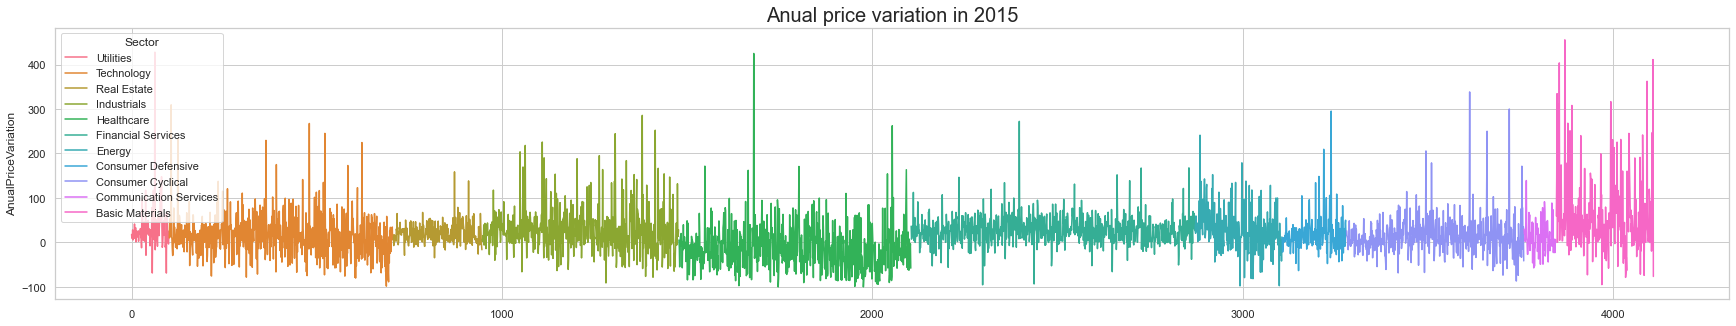

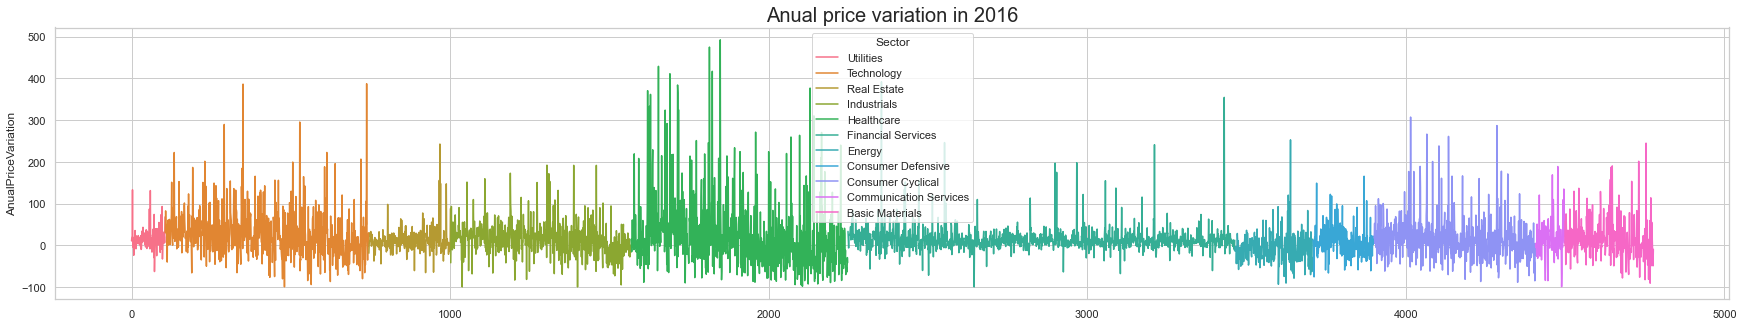

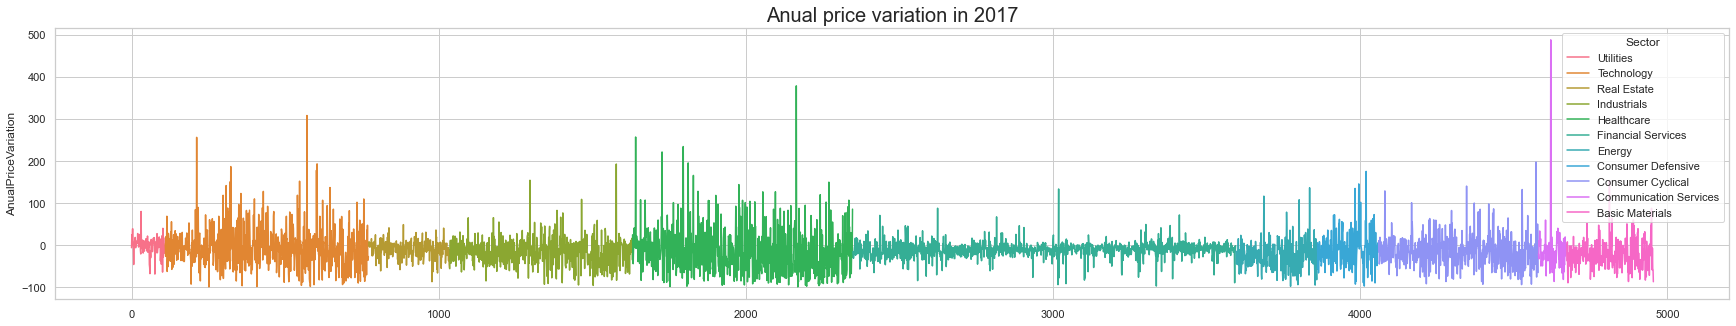

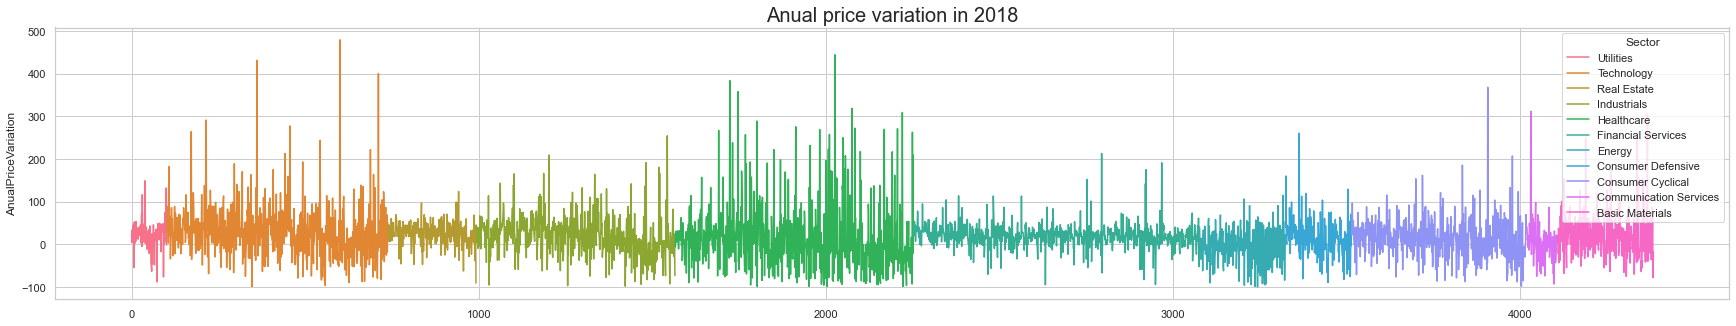

In [68]:
# Extract the columns we need in this step from the dataframe
df_ = df.loc[:, ['year', 'Sector', 'AnualPriceVariation']]
df_.sort_values(['year', 'Sector'], ascending=[True, False], inplace=True)
# Get list of sectors
year_list = df_['year'].unique()

# Plot the percent price variation for each sector
for y in year_list:
    
    temp = df_[df_['year'] == y]
    temp.reset_index(drop=True, inplace=True)
    plt.figure(figsize=(30,5))
    #plt.plot(temp['AnualPriceVariation'])
    sns.lineplot(x=temp.index, y='AnualPriceVariation', hue='Sector', data=temp)
    plt.title('Anual price variation in ' + str(y), fontsize=20)
    plt.show()

# STEP 3: MANEJO DE DATOS FALTANTES Y CEROS ANI

Buscamos en el dataset los datos nulos y valores cero. Para una primera aproximación realizamos un gráfico de barras para ver la presencia de estos valores en las distintas columnas.

Por ahora dejamos de lado las variables categóricas / objetivo Class, AnnualPriceVariation (y las de cada año)


In [19]:
df.head() 

,Ticker,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Long-term investments,Tax assets,Total non-current assets,Total assets,Payables,Short-term debt,Total current liabilities,Long-term debt,Total debt,Deferred revenue,Tax Liabilities,Deposit Liabilities,Total non-current liabilities,Total liabilities,Other comprehensive income,Retained earnings (deficit),Total shareholders equity,Investments,Net Debt,Other Assets,Other Liabilities,Depreciation & Amortization,Stock-based compensation,Operating Cash Flow,Capital Expenditure,Acquisitions and disposals,Investment purchases and sales,Investing Cash flow,Issuance (repayment) of debt,Issuance (buybacks) of shares,Dividend payments,Financing Cash Flow,Effect of forex changes on cash,Net cash flow / Change in cash,Free Cash Flow,Net Cash/Marketcap,priceBookValueRatio,priceToBookRatio,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceEarningsToGrowthRatio,priceSalesRatio,dividendYield,enterpriseValueMultiple,priceFairValue,ebitperRevenue,ebtperEBIT,niperEBT,grossProfitMargin,operatingProfitMargin,pretaxProfitMargin,netProfitMargin,effectiveTaxRate,returnOnAssets,returnOnEquity,returnOnCapitalEmployed,nIperEBT,eBTperEBIT,eBITperRevenue,payablesTurnover,inventoryTurnover,fixedAssetTurnover,assetTurnover,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,operatingCycle,daysOfPayablesOutstanding,cashConversionCycle,debtRatio,debtEquityRatio,longtermDebtToCapitalization,totalDebtToCapitalization,interestCoverage,cashFlowToDebtRatio,companyEquityMultiplier,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,payoutRatio,operatingCashFlowSalesRatio,freeCashFlowOperatingCashFlowRatio,cashFlowCoverageRatios,shortTermCoverageRatios,capitalExpenditureCoverageRatios,dividendpaidAndCapexCoverageRatios,dividendPayoutRatio,Revenue per Share,Net Income per Share,Operating Cash Flow per Share,Free Cash Flow per Share,Cash per Share,Book Value per Share,Tangible Book Value per Share,Shareholders Equity per Share,Interest Debt per Share,Market Cap,Enterprise Value,PE ratio,Price to Sales Ratio,POCF ratio,PFCF ratio,PB ratio,PTB ratio,EV to Sales,Enterprise Value over EBITDA,EV to Operating cash flow,EV to Free cash flow,Earnings Yield,Free Cash Flow Yield,Debt to Equity,Debt to Assets,Net Debt to EBITDA,Current ratio,Interest Coverage,Income Quality,Dividend Yield,Payout Ratio,SG&A to Revenue,R&D to Revenue,Intangibles to Total Assets,Capex to Operating Cash Flow,Capex to Revenue,Capex to Depreciation,Stock-based compensation to Revenue,Graham Number,ROIC,Return on Tangible Assets,Graham Net-Net,Working Capital,Tangible Asset Value,Net Current Asset Value,Invested Capital,Average Receivables,Average Payables,Average Inventory,Days Sales Outstanding,Days Payables Outstanding,Days of Inventory on Hand,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per Share

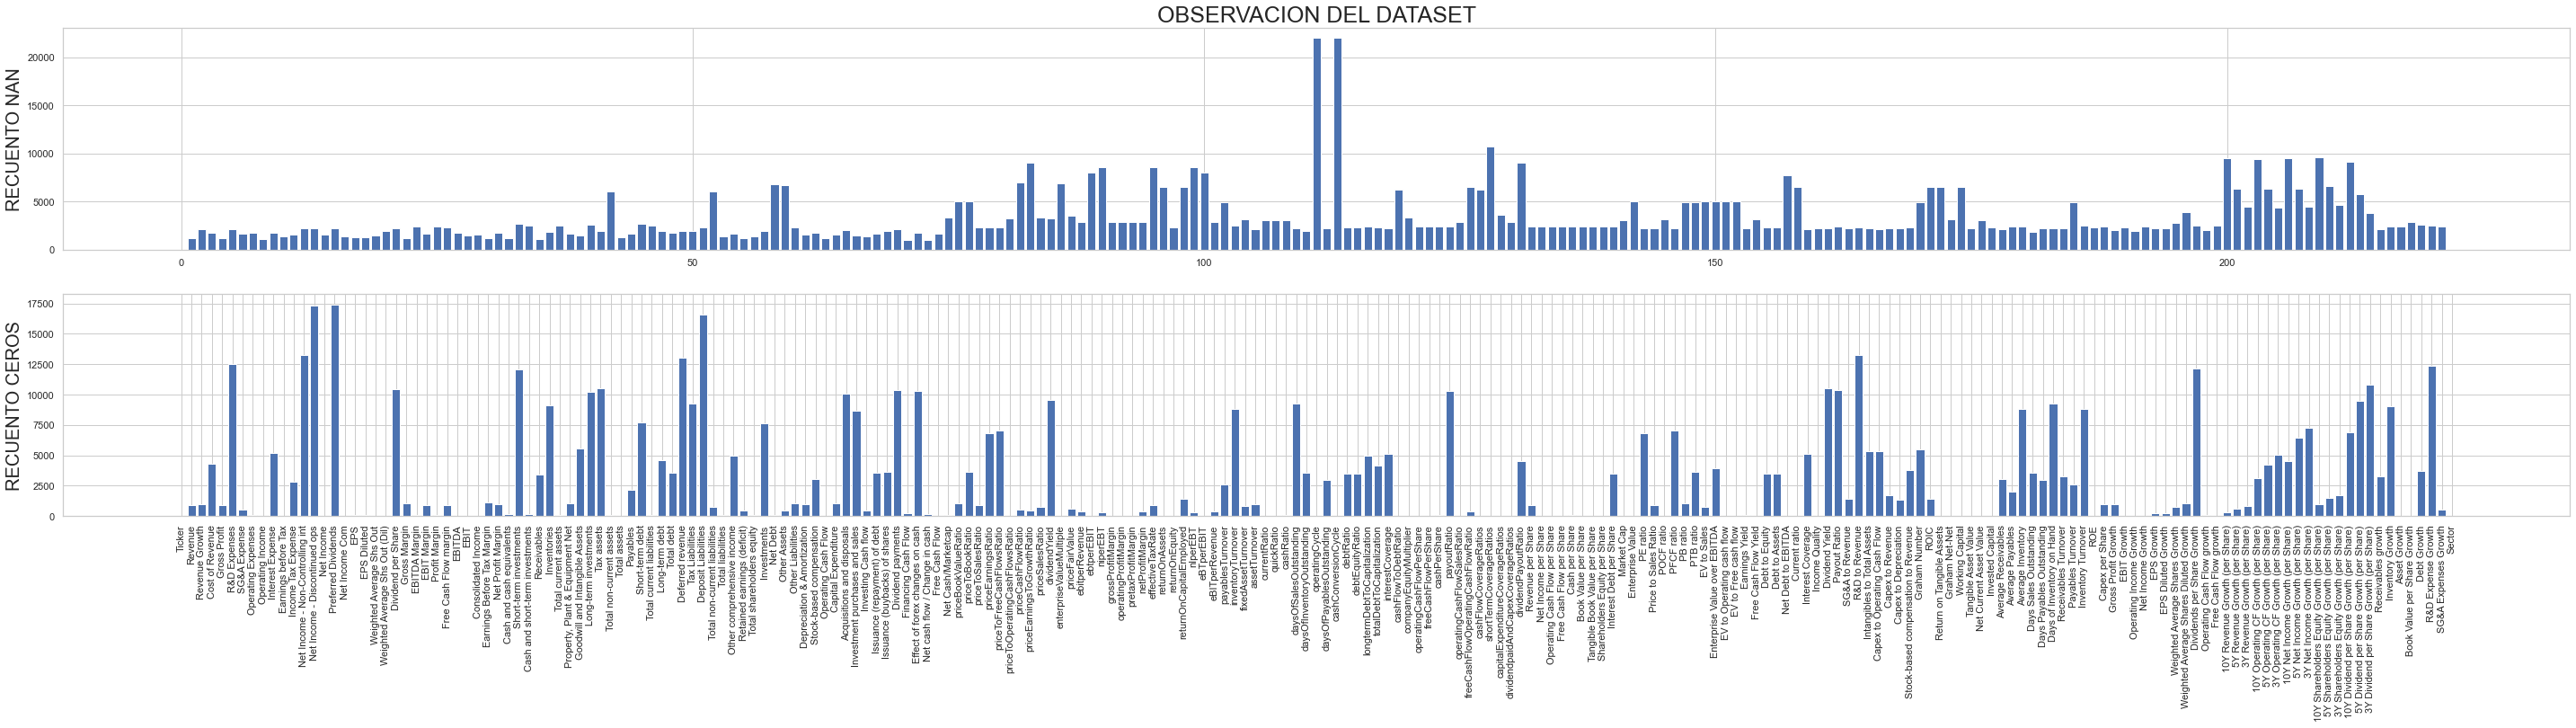

In [20]:
# Por ahora dejamos de lado las variables objetivo  
class_data = df.loc[:, ['Class','year','2015 PRICE VAR [%]','2016 PRICE VAR [%]','2017 PRICE VAR [%]','2018 PRICE VAR [%]','2019 PRICE VAR [%]','AnualPriceVariation']]
df.drop(['Class','year','2015 PRICE VAR [%]','2016 PRICE VAR [%]','2017 PRICE VAR [%]','2018 PRICE VAR [%]','2019 PRICE VAR [%]','AnualPriceVariation'], inplace=True, axis=1)
#si ya se corrió una vez este codigo hay que comentar las dos lineas de arriba para que no de error


# Graficamos los datos para ver una primera aproximacion de valores NAN y CEROS.
nan_vals = df.isna().sum()
zero_vals = df.isin([0]).sum()
ind = np.arange(df.shape[1])

plt.figure(figsize=(50,10))

plt.subplot(2,1,1)
plt.title('OBSERVACION DEL DATASET', fontsize=25)
plt.bar(ind, nan_vals.values.tolist())
plt.ylabel('RECUENTO NAN', fontsize=20)

plt.subplot(2,1,2)
plt.bar(ind, zero_vals.values.tolist())
plt.ylabel('RECUENTO CEROS', fontsize=20)
plt.xticks(ind, nan_vals.index.values, rotation='90')

plt.show()

Podemos observar que:
1. Hay muchos datos faltantes en algunos indicadores.
2. También hay muchos datos nulos (valor cero). Para algunos indicadores casi todos los registros tienen valor 0.


Para analizar la situación contamos la cantidad de ocurrencias de NAN y ceros y los ordenamos en orden descendente. Esto nos permite ver la dominancia de ambos tipos de datos. 

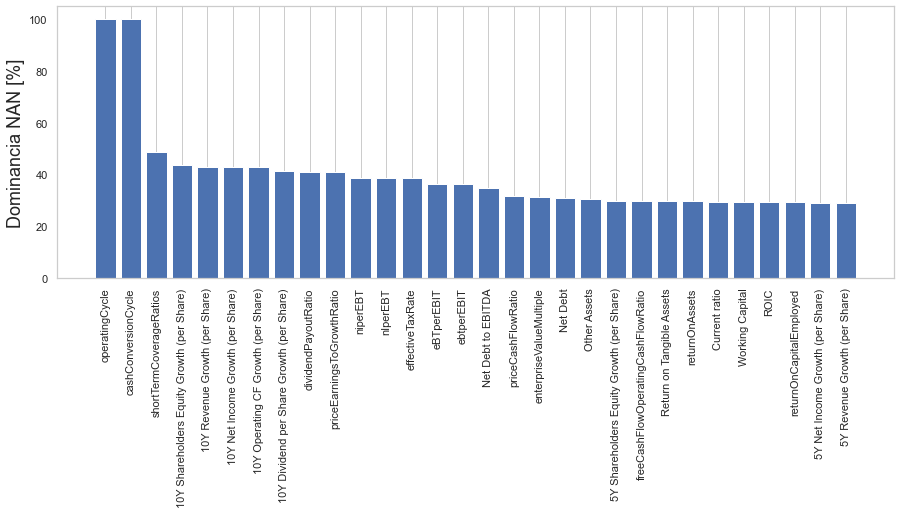

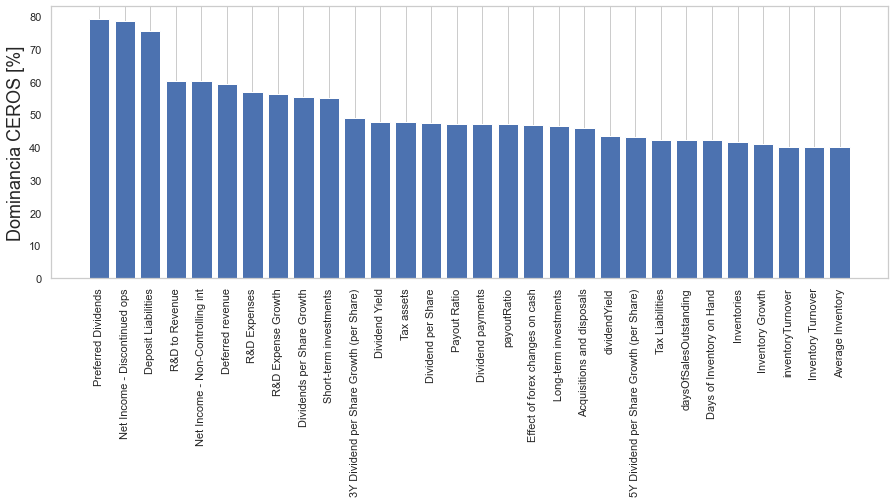

In [21]:
# Contamos y calculamos porcentaje de nan y ceros
total_nans = df.isnull().sum().sort_values(ascending=False)
percent_nans = (df.isnull().sum()/df.isnull().count() * 100).sort_values(ascending=False)
total_zeros = df.isin([0]).sum().sort_values(ascending=False)
percent_zeros = (df.isin([0]).sum()/df.isin([0]).count() * 100).sort_values(ascending=False)
df_nans = pd.concat([total_nans, percent_nans], axis=1, keys=['Total NaN', 'Percent NaN'])
df_zeros = pd.concat([total_zeros, percent_zeros], axis=1, keys=['Total Zeros', 'Percent Zeros'])

# Representación gráfica
plt.figure(figsize=(15,5))
plt.bar(np.arange(30), df_nans['Percent NaN'].iloc[:30].values.tolist())
plt.xticks(np.arange(30), df_nans['Percent NaN'].iloc[:30].index.values.tolist(), rotation='90')
plt.ylabel('Dominancia NAN [%]', fontsize=18)
plt.grid(alpha=0.3, axis='y')
plt.show()

plt.figure(figsize=(15,5))
plt.bar(np.arange(30), df_zeros['Percent Zeros'].iloc[:30].values.tolist())
plt.xticks(np.arange(30), df_zeros['Percent Zeros'].iloc[:30].index.values.tolist(), rotation='90')
plt.ylabel('Dominancia CEROS [%]', fontsize=18)
plt.grid(alpha=0.3, axis='y')
plt.show()

Los gráficos muestran la necesidad de tomar acción sobre los datos nulos o cero. Las opciones son:


The two plots above clearly show that to improve the quality of the dataframe `df` we need to:
1. imputar los datos faltantes.
2. imputar o descartar aquellos indicadores con gran dominancia de ceros.

**Esto nos lleva a definir un nivel de "tolerancia" para la dominancia de nan y ceros**


Un criterio podría ser definir un porcentaje máximo de registros para ambos tipos de datos (ceros y nan)
Si una columna tiene un porcentaje de nan y ceros mayor a este nivel de tolerancia, la descartamos. 

En este caso sabemos que tenemos alrededor de 23000 registros. 
 
Si definieramos los umbrales de tolerancia de la siguiente manera:
* umbral tolerancia dominancia nan = 5-10%
* umbral tolerancia dominancia cero = 5-10% 
 
Iterando df_nans y df_zeros se computan los percentiles para calcular el numero de columnas que se excluirán del análisis.
De esta forma observamos que:
* necesitaríamos excluir el 50% de los indicadores con mayor dominancia de nans para no tener columnas con más de 2300 valores `nan`, lo cial se corresponde con una dominancia del 10,83%.
* necesitaríamos excluir el 40% de los indicadores con mayor dominancia de ceros para no tener columnas con más de 1404 valores `0`, lo cual se corresponde con una dominancia del 6,36%.


In [22]:
#Encontrar umbrales razonables para valores nan 
test_nan_level = 0.5
print(df_nans.quantile(test_nan_level))
_, thresh_nan = df_nans.quantile(test_nan_level)

#Encontrar umbrales razonables para valores cero 
test_zeros_level = 0.6
print(df_zeros.quantile(test_zeros_level))
_, thresh_zeros = df_zeros.quantile(test_zeros_level)

Total NaN      2376.000000
Percent NaN      10.793622
Name: 0.5, dtype: float64
Total Zeros      1393.000000
Percent Zeros       6.328079
Name: 0.6, dtype: float64


Si procedemos a eliminar las columnas que superan estos umbrales de tolerancia máxima del dataset, pasaríamos a tener 56 columnas (indicadores financieros) en el dataset (originalmente eran 223). Al hacerlo eliminamos aquellas columnas caracterizadas por fuerte dominancia de ceros y nans.

Debemos tener en cuenta que esto puede ser un enfoque agresivo y podríamos estar eliminando información valiosa. 


In [23]:
# Clean dataset applying thresholds for both zero values, nan-values
print(f'NUMERO DE VARIABLES ORIGINALES: {df.shape[1]}')
print()

#df sin NaN's
df_test1 = df.drop((df_nans[df_nans['Percent NaN'] > thresh_nan]).index, 1) 
print(f'NUMERO DE VARIABLES APLICANDO UMBRAL NaN {thresh_nan:.2f}%: {df_test1.shape[1]}')
print()

df_zeros_postnan = df_zeros.drop((df_nans[df_nans['Percent NaN'] > thresh_nan]).index, axis=0)
df_test1 = df_test1.drop((df_zeros_postnan[df_zeros_postnan['Percent Zeros'] > thresh_zeros]).index, 1)
print(f'NUMERO DE VARIABLES APLICANDO UMBRAL CEROS {thresh_zeros:.2f}%: {df_test2.shape[1]}')

NUMERO DE VARIABLES ORIGINALES: 223

NUMERO DE VARIABLES APLICANDO UMBRAL NaN 10.79%: 112

NUMERO DE VARIABLES APLICANDO UMBRAL CEROS 6.33%: 56


# STEP 4: MATRIZ DE CORRELACION Y NUEVA EVALUACION DE VALORES FALTANTES***ANI***

La matriz de correlacion es una herramienta que puede usarse para evaluar la correlacion lineal entre las variables (indicadores financieros para nuestro caso de estudio). Una correlacion positiva (valor cercano a 1) significa que dos variables se mueven en el mismo sentido y una correlacion negativa (valor cercano a -1) que lo hacen de manera inversamente proporcional. Un índice de correlación cercano a cero significa que las variables no tienen correlación (lineal). 

NOTA: La correlación en ningún caso implica causalidad. 

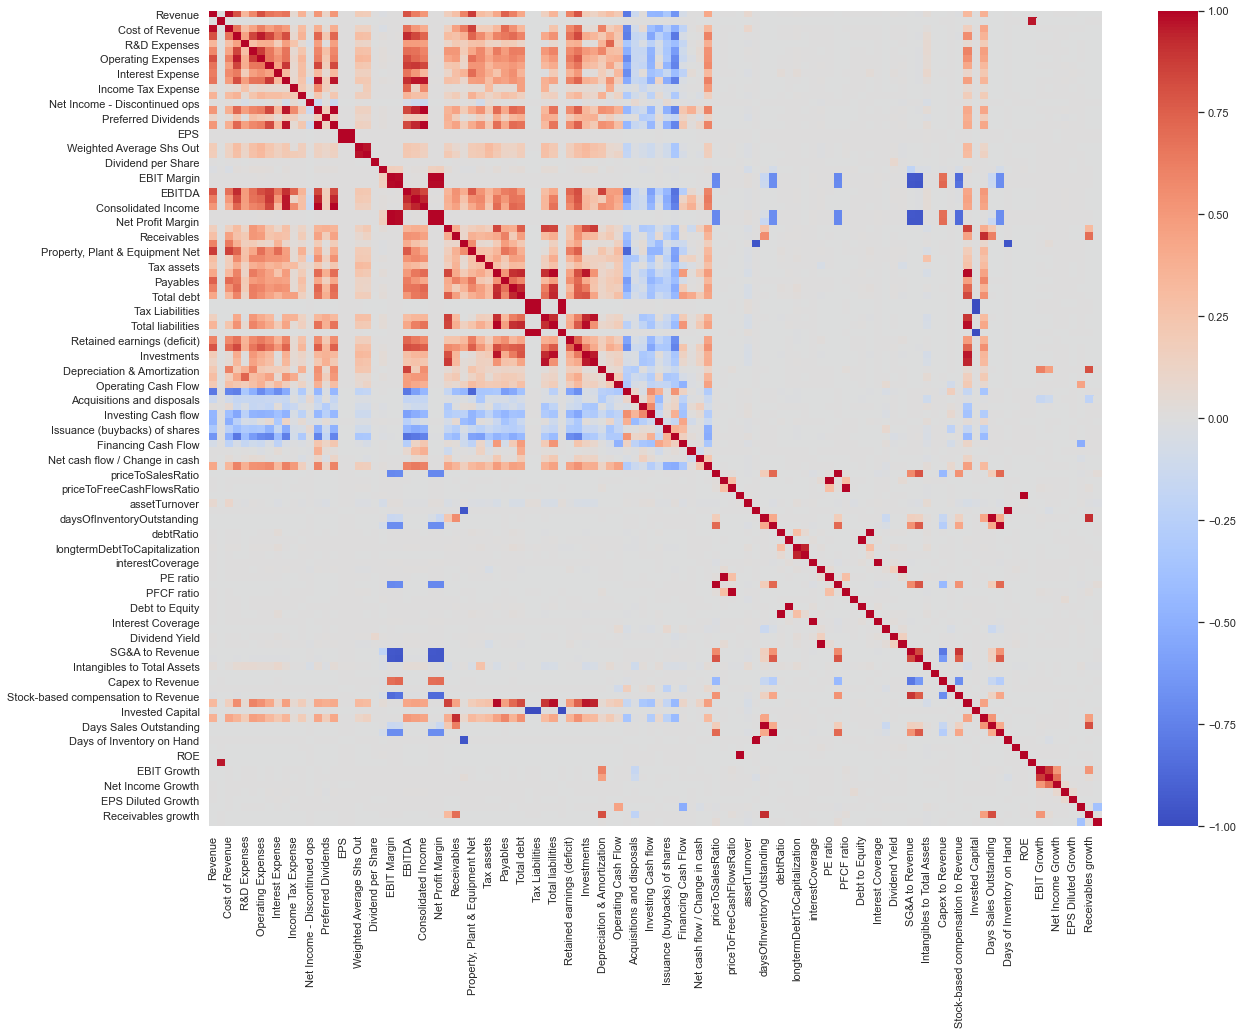

In [28]:
# Graficar matriz de correlación
fig, ax = plt.subplots(figsize=(20,15)) 
sns.heatmap(df_test1.corr(), annot=False, cmap='coolwarm', vmin=-1, vmax=1, center=0, ax=ax)
plt.show()

Al observar la matriz de correlacion podemos ver que una parte de los indicadores no muestran correlación lineal de ningun tipo.  Esos indicadores financieros son los que tienen gran dominancia de nan (como se destaca en el diagrama de barras). Esto significa que este gráfico podría cambiar una vez que se imputen los valores `nan`.


Podemos evaluar el impacto de nuestras decisiones en términos de niveles de umbral graficando nuevamente el conteo de valores faltantes y entradas con valor 0 que ocurren en los indicadores financieros que mantenemos en el dataset. La situación claramente ha mejorado, incluso si algunos indicadores financieros mantienen altos niveles de dominancia nan, lo cual es evidente cuando se observa la matriz de correlación anterior.

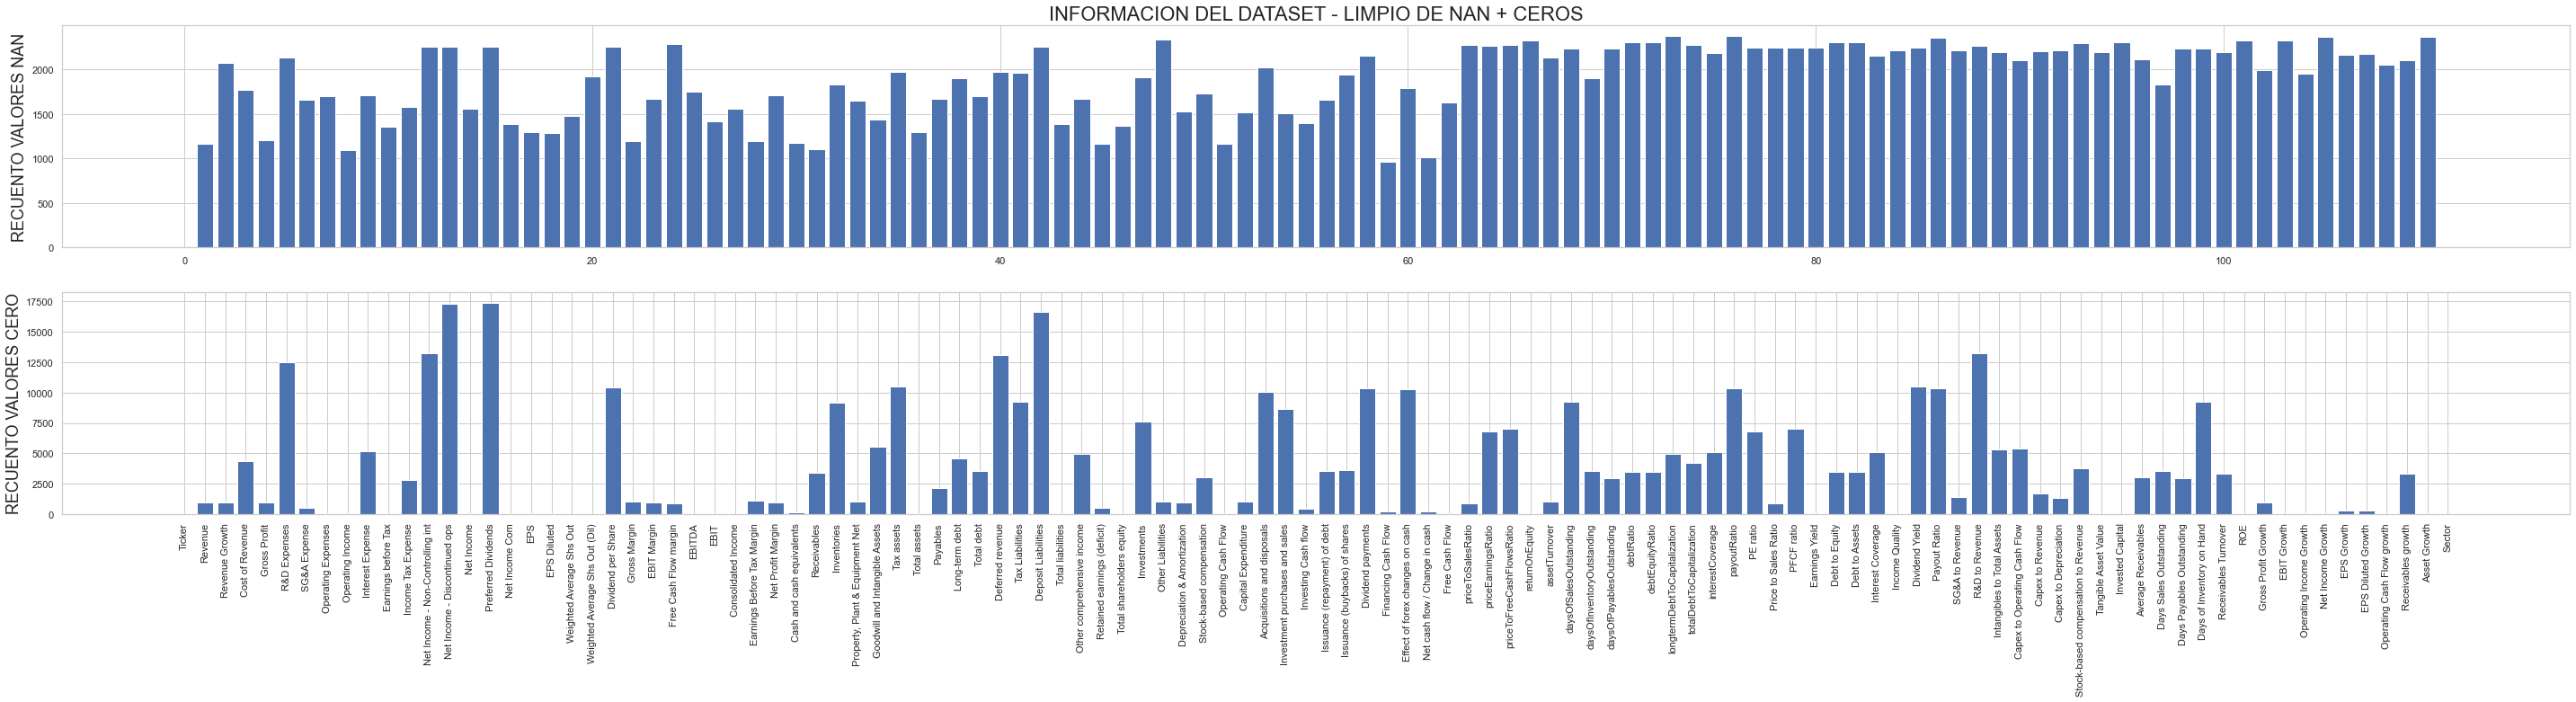

In [32]:
# New check on nan values
plt.figure(figsize=(50,10))

plt.subplot(2,1,1)
plt.title('INFORMACION DEL DATASET - LIMPIO DE NAN + CEROS', fontsize=22)
plt.bar(np.arange(df_test1.shape[1]), df_test1.isnull().sum())
plt.ylabel('RECUENTO VALORES NAN', fontsize=18)

plt.subplot(2,1,2)
plt.bar(np.arange(df_test1.shape[1]), df_test1.isin([0]).sum())
plt.ylabel('RECUENTO VALORES CERO', fontsize=18)
plt.xticks(np.arange(df_test1.shape[1]), df_test1.columns.values, rotation='90')

plt.show()

# Paso 5: Manejo de valores extremos ***Victor***

Analizando el `df` wcon el metodo `.describe()` podemos ver que algunos indicadores financieros muestran un a larga discrepancia con el percentil 75%. Es más, también tenemos una desviación estandard que es muy grande!. Esto puede ser un signo de presencia de 'outliers': siendo conservativos, vamos a descartar el 3% inferior y el 3% de cada indicador financiero.

In [33]:
# Analyze dataframe
df_test1.describe()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBIT Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Receivables,Inventories,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Tax assets,Total assets,Payables,Long-term debt,Total debt,Deferred revenue,Tax Liabilities,Deposit Liabilities,Total liabilities,Other comprehensive income,Retained earnings (deficit),Total shareholders equity,Investments,Other Liabilities,Depreciation & Amortization,Stock-based compensation,Operating Cash Flow,Capital Expenditure,Acquisitions and disposals,Investment purchases and sales,Investing Cash flow,Issuance (repayment) of debt,Issuance (buybacks) of shares,Dividend payments,Financing Cash Flow,Effect of forex changes on cash,Net cash flow / Change in cash,Free Cash Flow,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,returnOnEquity,assetTurnover,daysOfSalesOutstanding,daysOfInventoryOutstanding,daysOfPayablesOutstanding,debtRatio,debtEquityRatio,longtermDebtToCapitalization,totalDebtToCapitalization,interestCoverage,payoutRatio,PE ratio,Price to Sales Ratio,PFCF ratio,Earnings Yield,Debt to Equity,Debt to Assets,Interest Coverage,Income Quality,Dividend Yield,Payout Ratio,SG&A to Revenue,R&D to Revenue,Intangibles to Total Assets,Capex to Operating Cash Flow,Capex to Revenue,Capex to Depreciation,Stock-based compensation to Revenue,Tangible Asset Value,Invested Capital,Average Receivables,Days Sales Outstanding,Days Payables Outstanding,Days of Inventory on Hand,Receivables Turnover,ROE,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Operating Cash Flow growth,Receivables growth,Asset Growth
count,2.084600e+04,19937.000000,2.024600e+04,2.080900e+04,1.988200e+04,2.034800e+04,2.031400e+04,2.091500e+04,2.029800e+04,2.065300e+04,2.042900e+04,1.976200e+04,1.976200e+04,2.045500e+04,1.976200e+04,2.062600e+04,2.071800e+04,2.072700e+04,2.053400e+04,2.008900e+04,19762.000000,20818.000000,20343.000000,19731.000000,2.026700e+04,2.059100e+04,2.045300e+04,20822.000000,20298.000000,2.083800e+04,2.091200e+04,2.018600e+04,2.035800e+04,2.058000e+04,2.003900e+04,2.071200e+04,2.034700e+04,2.011500e+04,2.031500e+04,2.003600e+04,2.005100e+04,1.975300e+04,2.062100e+04,2.034600e+04,2.085100e+04,2.064500e+04,2.009900e+04,1.968000e+04,2.048900e+04,2.028700e+04,2.084900e+04,2.049400e+04,1.998500e+04,2.050600e+04,2.061200e+04,2.035000e+04,2.007500e+04,1.986200e+04,2.104500e+04,2.022600e+04,2.099900e+04,2.038100e+04,19736.000000,19743.000000,19742.000000,1.968500e+04,19874.000000,1.977700e+04,2.011000e+04,1.978200e+04,19709.000000,19709.000000,19637.000000,19732.000000,19831.000000,19639.000000,19770.000000,19763.000000,19769.000000,19770.000000,19709.000000,19709.000000,19860.000000,19799.000000,19772.000000,19659.000000,19794.000000,19745.000000,19821.000000,19908.000000,19810.000000,19794.000000,19719.000000,1.982100e+04,1.970800e+04,1.990000e+04,2.018000e+04,1.978000e+04,1.977500e+04,19817.000000,1.968300e+04,20017.000000,19684.000000,20057.000000,19644.000000,19846.000000,1.983600e+04,19962.000000,19904.000000,19642.000000
mean,5.175040e+09,3.630200,3.267312e+09,1.975751e+09,1.035929e+08,8.721903e+08,1.371899e+09,5.913817e+08,9.812175e+07,4.943708e+08,1.320765e+08,1.343594e+07,-3.252785e+06,3.897688e+08,4.680910e+06,3.886420e+08,-1.068730e+04,-1.076585e+04,2.636691e+08,2.670807e+08,1.218820,0.487982,-7.276485,-6.306872,9.314459e+08,6.180775e+08,4.028326e+08,-7.231617,-7.297056,1.899797e+09,9.786676e+08,5.053541e+08,2.720472e+09,1.735898e+09,1.525476e+08,2.046257e+10,9.1849

In [34]:
# Poda de valores extremos
top_quantiles = df_test1.quantile(0.97)
outliers_top = (df_test1 > top_quantiles)

low_quantiles = df_test1.quantile(0.03)
outliers_low = (df_test1 < low_quantiles)

df_test1 = df_test1.mask(outliers_top, top_quantiles, axis=1)
df_test1 = df_test1.mask(outliers_low, low_quantiles, axis=1)

df_test1.describe()

C:\Users\DTC21\AppData\Local\Temp\ipykernel_15480\2179791769.py:3: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers_top = (df_test1 > top_quantiles)
C:\Users\DTC21\AppData\Local\Temp\ipykernel_15480\2179791769.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers_low = (df_test1 < low_quantiles)


,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBIT Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Receivables,Inventories,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Tax assets,Total assets,Payables,Long-term debt,Total debt,Deferred revenue,Tax Liabilities,Deposit Liabilities,Total liabilities,Other comprehensive income,Retained earnings (deficit),Total shareholders equity,Investments,Other Liabilities,Depreciation & Amortization,Stock-based compensation,Operating Cash Flow,Capital Expenditure,Acquisitions and disposals,Investment purchases and sales,Investing Cash flow,Issuance (repayment) of debt,Issuance (buybacks) of shares,Dividend payments,Financing Cash Flow,Effect of forex changes on cash,Net cash flow / Change in cash,Free Cash Flow,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,returnOnEquity,assetTurnover,daysOfSalesOutstanding,daysOfInventoryOutstanding,daysOfPayablesOutstanding,debtRatio,debtEquityRatio,longtermDebtToCapitalization,totalDebtToCapitalization,interestCoverage,payoutRatio,PE ratio,Price to Sales Ratio,PFCF ratio,Earnings Yield,Debt to Equity,Debt to Assets,Interest Coverage,Income Quality,Dividend Yield,Payout Ratio,SG&A to Revenue,R&D to Revenue,Intangibles to Total Assets,Capex to Operating Cash Flow,Capex to Revenue,Capex to Depreciation,Stock-based compensation to Revenue,Tangible Asset Value,Invested Capital,Average Receivables,Days Sales Outstanding,Days Payables Outstanding,Days of Inventory on Hand,Receivables Turnover,ROE,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Operating Cash Flow growth,Receivables growth,Asset Growth
count,2.084600e+04,19937.000000,2.024600e+04,2.080900e+04,1.988200e+04,2.034800e+04,2.031400e+04,2.091500e+04,2.029800e+04,2.065300e+04,2.042900e+04,1.976200e+04,1.976200e+04,2.045500e+04,1.976200e+04,2.062600e+04,20718.000000,20727.000000,2.053400e+04,2.008900e+04,19762.000000,20818.000000,20343.000000,19731.000000,2.026700e+04,2.059100e+04,2.045300e+04,20822.000000,20298.000000,2.083800e+04,2.091200e+04,2.018600e+04,2.035800e+04,2.058000e+04,2.003900e+04,2.071200e+04,2.034700e+04,2.011500e+04,2.031500e+04,2.003600e+04,2.005100e+04,1.975300e+04,2.062100e+04,2.034600e+04,2.085100e+04,2.064500e+04,2.009900e+04,1.968000e+04,2.048900e+04,2.028700e+04,2.084900e+04,2.049400e+04,1.998500e+04,2.050600e+04,2.061200e+04,2.035000e+04,2.007500e+04,1.986200e+04,2.104500e+04,2.022600e+04,2.099900e+04,2.038100e+04,19736.000000,19743.000000,19742.000000,19685.000000,19874.000000,19777.000000,20110.000000,19782.000000,19709.000000,19709.000000,19637.000000,19732.000000,19831.000000,19639.000000,19770.000000,19763.000000,19769.000000,19770.000000,19709.000000,19709.000000,19860.000000,19799.000000,19772.000000,19659.000000,19794.000000,19745.000000,19821.000000,19908.000000,19810.000000,19794.000000,19719.000000,1.982100e+04,1.970800e+04,1.990000e+04,20180.000000,19780.000000,19775.000000,19817.000000,19683.000000,20017.000000,19684.000000,20057.000000,19644.000000,19846.000000,19836.000000,19962.000000,19904.000000,19642.000000
mean,3.262361e+09,0.130472,1.765942e+09,1.322960e+09,3.498604e+07,5.714413e+08,9.128678e+08,3.994556e+08,6.603349e+07,3.319645e+08,8.934321e+07,5.744444e+06,-3.250757e+05,2.539446e+08,1.069971e+06,2.552588e+08,0.548288,0.515643,1.386196e+08,1.376003e+08,0.484797,0.514302,-0.324803,-0.372688,6.310191e+08,4.180149e+08,2.659363e+08,-0.368521,-0.393780,4.921214e+08,4.718604e+08,2.322882e+08,1.647399e+09,1.049047e+09,5.717715e+07,8.858626e+09,3.838792e+08,1.8

Mirando la descripción estadistica del `df` despues de la poda de valores extremos, podemos ver que **disminuimos considerablemente la desviación estandard**, y también la discrepancia entre el valor máximo y el percentil 75% es menor.

# Paso 6: Rellenar valores perdidos ***Victor***

AHora podemos rellenar los valores perdidos ¿Pero como? Hay varios métodos que podemos utilizar:
* Rellenar los `nan` con 0
* Rellenar `nan` con el valor medio de la columna.
* Rellenar `nan` con la mediana de la columna.
* Rellenar `nan` con la moda de la columna
* Rellenar `nan` con el valor previo
* ...

En este caso, piesno que sería apropiado rellenar los valores faltantes con el promedio de la columna. Sin embargo, no nos debemos olvidar las características intrínsecas de los datos con los que estamos trabajando: **Tenemos acciones de diferentes sectores de la economía**. Es esperable que cada sector este caracterizado por macro-tendencias y macro-factores que influencien de alguna forma a su grupo. Entonces, recomiendo que utilizemos el método que en forma práctica se tranaslada en: **comletar los valores faltantes con el valor medio de la columna, agrupado por sector**.

In [35]:
# Rellenar los 'nan' con el valor medio de la columna, agrupados por sector individualmente.
df_test1 = df_test1.groupby(['Sector']).transform(lambda x: x.fillna(x.mean()))

Con el resultado, podemos graficar la matriz de correlación nuevamente para evaluar el impacto de nuestras decisiones.

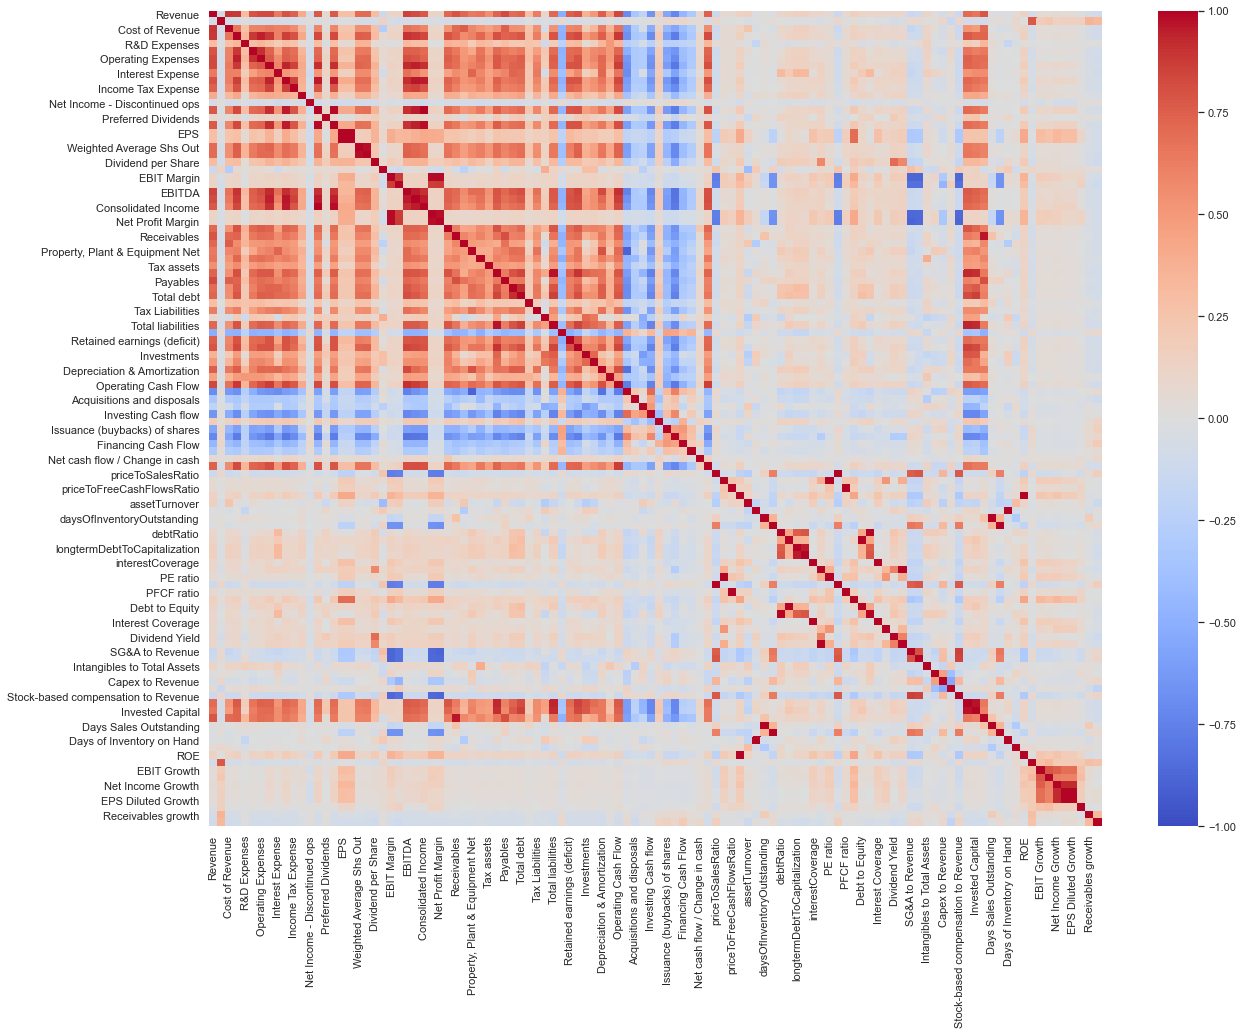

In [37]:
# Graficamos la matriz de correlación con el datset resultante
fig, ax = plt.subplots(figsize=(20,15)) 
sns.heatmap(df_test1.corr(), annot=False, cmap='coolwarm', vmin=-1, vmax=1, center=0, ax=ax)
plt.show()

Como podemos ver, las porciones de los indicadores financieros que tenian correlacion 0, ahora tienen una valor más orgánico (ya sea correlación positiva o negativa), gracias al hecho de que reemplazamos los valores perdidos con la respectiva media del sector al que pertenecen.

# Paso 7: agregamos los datos objetivo

Como recuerdan, habíamos eliminado los datos objetivos del dataframe. Sin embargo, los necesitamos de vuelta en el dataset para poder utilizar algoritmos de aprendizaje automático. Esto se puede lograr facilmente con algunas lineas de código `.join()` .

Finalmente, podemos redondear este cuaderno imprimiendo  tanto `.info()` como `.describe()` del dataframe final `df_out`.

In [38]:
# Sumo la comuna de Sector
df_out = df_test1.join(df['Sector'])

# Sumo las columnas de clasificacións
df_out = df_out.join(class_data)

# Imprimo la información del dataset final
df_out.info()
df_out.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22013 entries, 0 to 22076
Columns: 119 entries, Revenue to AnualPriceVariation
dtypes: float64(116), int64(2), object(1)
memory usage: 20.7+ MB


,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBIT Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Receivables,Inventories,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Tax assets,Total assets,Payables,Long-term debt,Total debt,Deferred revenue,Tax Liabilities,Deposit Liabilities,Total liabilities,Other comprehensive income,Retained earnings (deficit),Total shareholders equity,Investments,Other Liabilities,Depreciation & Amortization,Stock-based compensation,Operating Cash Flow,Capital Expenditure,Acquisitions and disposals,Investment purchases and sales,Investing Cash flow,Issuance (repayment) of debt,Issuance (buybacks) of shares,Dividend payments,Financing Cash Flow,Effect of forex changes on cash,Net cash flow / Change in cash,Free Cash Flow,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,returnOnEquity,assetTurnover,daysOfSalesOutstanding,daysOfInventoryOutstanding,daysOfPayablesOutstanding,debtRatio,debtEquityRatio,longtermDebtToCapitalization,totalDebtToCapitalization,interestCoverage,payoutRatio,PE ratio,Price to Sales Ratio,PFCF ratio,Earnings Yield,Debt to Equity,Debt to Assets,Interest Coverage,Income Quality,Dividend Yield,Payout Ratio,SG&A to Revenue,R&D to Revenue,Intangibles to Total Assets,Capex to Operating Cash Flow,Capex to Revenue,Capex to Depreciation,Stock-based compensation to Revenue,Tangible Asset Value,Invested Capital,Average Receivables,Days Sales Outstanding,Days Payables Outstanding,Days of Inventory on Hand,Receivables Turnover,ROE,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Operating Cash Flow growth,Receivables growth,Asset Growth,Class,year,2015 PRICE VAR [%],2016 PRICE VAR [%],2017 PRICE VAR [%],2018 PRICE VAR [%],2019 PRICE VAR [%],AnualPriceVariation
count,2.201300e+04,22013.000000,2.201300e+04,2.201300e+04,2.201300e+04,2.201300e+04,2.201300e+04,2.201300e+04,2.201300e+04,2.201300e+04,2.201300e+04,2.201300e+04,2.201300e+04,2.201300e+04,2.201300e+04,2.201300e+04,22013.000000,22013.000000,2.201300e+04,2.201300e+04,22013.000000,22013.000000,22013.000000,22013.000000,2.201300e+04,2.201300e+04,2.201300e+04,22013.000000,22013.000000,2.201300e+04,2.201300e+04,2.201300e+04,2.201300e+04,2.201300e+04,2.201300e+04,2.201300e+04,2.201300e+04,2.201300e+04,2.201300e+04,2.201300e+04,2.201300e+04,2.201300e+04,2.201300e+04,2.201300e+04,2.201300e+04,2.201300e+04,2.201300e+04,2.201300e+04,2.201300e+04,2.201300e+04,2.201300e+04,2.201300e+04,2.201300e+04,2.201300e+04,2.201300e+04,2.201300e+04,2.201300e+04,2.201300e+04,2.201300e+04,2.201300e+04,2.201300e+04,2.201300e+04,22013.000000,22013.000000,22013.000000,22013.000000,22013.000000,22013.000000,22013.000000,22013.000000,22013.000000,22013.000000,22013.000000,22013.000000,22013.000000,22013.000000,22013.000000,22013.000000,22013.000000,22013.000000,22013.000000,22013.000000,22013.000000,22013.000000,22013.000000,22013.000000,22013.000000,22013.000000,22013.000000,22013.000000,22013.000000,22013.000000,22013.000000,2.201300e+04,2.201300e+04,2.201300e+04,22013.000000,22013.000000,22013.000000,22013.000000,22013.000000,22013.000000,22013.000000,22013.000000,22013.000000,22013.000000,22013.000000,22013.000000,22013.000000,22013.000000,22013.000000,22013.000000,3786.000000,4110.000000,4778.000000,4955.000000,4384.000000,22013.000000
mean,3.235661e+09,0.130245,1.699489e+09,1.332805e+09,3.246060e+07,5.870850e+08,9.280654e+08,4.030473e+08,6.427962e+07,3.361322e+08,9.153212e+07,5.911222e+06,-3.228141e+05,2.599439e+08,1.116071e+06,2.612477e+08,0.597486,0.564456,1.384

En este cuaderno, exploramos los indicadores financieros de una lista de acciones relativas al periodo 2014-2018. Despues de una primera investigación de los aspectos básicos de los datos, hicimos limpieza de datos en orden de mejorar la usabilidad de los datos.

In [39]:
df_out.to_csv('dfFinalEntrega2.csv')